In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
epl_15_16_matches = pd.read_csv('england-premier-league-matches-2015-to-2016-stats.csv')
epl_16_17_matches = pd.read_csv('england-premier-league-matches-2016-to-2017-stats.csv')
epl_17_18_matches = pd.read_csv('england-premier-league-matches-2017-to-2018-stats.csv')
epl_18_19_matches = pd.read_csv('england-premier-league-matches-2018-to-2019-stats.csv')
epl_19_20_matches = pd.read_csv('england-premier-league-matches-2019-to-2020-stats.csv')

In [3]:
epl_15_20_matches = pd.concat([epl_15_16_matches, epl_16_17_matches, 
                               epl_17_18_matches,epl_18_19_matches, epl_19_20_matches], axis=0)

In [4]:
epl_15_20_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 379
Data columns (total 64 columns):
timestamp                              1900 non-null int64
date_GMT                               1900 non-null object
status                                 1900 non-null object
attendance                             1868 non-null float64
home_team_name                         1900 non-null object
away_team_name                         1900 non-null object
referee                                1165 non-null object
Game Week                              1900 non-null int64
Pre-Match PPG (Home)                   1900 non-null float64
Pre-Match PPG (Away)                   1900 non-null float64
home_ppg                               1900 non-null float64
away_ppg                               1900 non-null float64
home_team_goal_count                   1900 non-null int64
away_team_goal_count                   1900 non-null int64
total_goal_count                       1900 non-null 

In [5]:
epl_15_16_teams = pd.read_csv('england-premier-league-teams-2015-to-2016-stats.csv')
epl_16_17_teams = pd.read_csv('england-premier-league-teams-2016-to-2017-stats.csv')
epl_17_18_teams = pd.read_csv('england-premier-league-teams-2017-to-2018-stats.csv')
epl_18_19_teams = pd.read_csv('england-premier-league-teams-2018-to-2019-stats.csv')
epl_19_20_teams = pd.read_csv('england-premier-league-teams-2019-to-2020-stats.csv')

In [6]:
epl_15_20_teams = pd.concat([epl_15_16_teams, epl_16_17_teams, 
                               epl_17_18_teams,epl_18_19_teams, epl_19_20_teams], axis=0)

In [7]:
epl_15_20_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Columns: 293 entries, team_name to over145_corners_percentage
dtypes: float64(36), int64(253), object(4)
memory usage: 229.7+ KB


In [8]:
epl_15_16_teams2 = pd.read_csv('england-premier-league-teams2-2015-to-2016-stats.csv')
epl_16_17_teams2 = pd.read_csv('england-premier-league-teams2-2016-to-2017-stats.csv')
epl_17_18_teams2 = pd.read_csv('england-premier-league-teams2-2017-to-2018-stats.csv')
epl_18_19_teams2 = pd.read_csv('england-premier-league-teams2-2018-to-2019-stats.csv')
epl_19_20_teams2 = pd.read_csv('england-premier-league-teams2-2019-to-2020-stats.csv')

In [9]:
epl_15_20_teams2 = pd.concat([epl_15_16_teams2, epl_16_17_teams2, 
                               epl_17_18_teams2,epl_18_19_teams2, epl_19_20_teams2], axis=0)

In [10]:
epl_15_20_teams2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Columns: 442 entries, team_name to failed_to_score_2h_away
dtypes: float64(42), int64(396), object(4)
memory usage: 346.1+ KB


In [11]:
epl_15_20_matches[['Game Week','home_team_name','away_team_name','Pre-Match PPG (Home)','Pre-Match PPG (Away)']].head(30)

,Game Week,home_team_name,away_team_name,Pre-Match PPG (Home),Pre-Match PPG (Away)
0,1,Manchester United,Tottenham Hotspur,0.0,0.0
1,1,AFC Bournemouth,Aston Villa,0.0,0.0
2,1,Norwich City,Crystal Palace,0.0,0.0
3,1,Leicester City,Sunderland,0.0,0.0
4,1,Everton,Watford,0.0,0.0
5,1,Chelsea,Swansea City,0.0,0.0
6,1,Newcastle United,Southampton,0.0,0.0
7,1,Arsenal,West Ham United,0.0,0.0
8,1,Stoke City,Liverpool,0.0,0.0
9,1,West Bromwich Albion,Manchester City,0.0,0.0


In [12]:
epl_15_20_matches.reset_index(drop=True, inplace=True)

In [13]:
conditions = [
    (epl_15_20_matches['home_team_goal_count'] == epl_15_20_matches['away_team_goal_count']),
    (epl_15_20_matches['home_team_goal_count'] > epl_15_20_matches['away_team_goal_count']),
    (epl_15_20_matches['home_team_goal_count'] < epl_15_20_matches['away_team_goal_count'])
]

# create a list of the values we want to assign for each condition
values = ['D', 'H', 'A']
values2 = [0, 1, -1]

# create a new column and use np.select to assign values to it using our lists as arguments
epl_15_20_matches['match_result_txt'] = np.select(conditions, values)
epl_15_20_matches['match_result'] = np.select(conditions, values2)

epl_15_20_matches[['home_team_goal_count','away_team_goal_count','match_result']].head()

,home_team_goal_count,away_team_goal_count,match_result
0,1,0,1
1,0,1,-1
2,1,3,-1
3,4,2,1
4,2,2,0


Text(0.5, 1.0, 'Match Result')

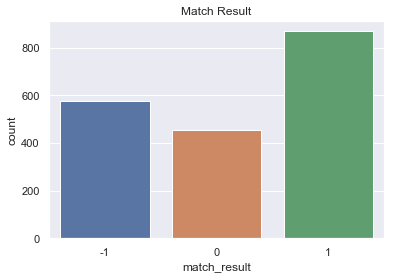

In [14]:
sns.set_theme(style="darkgrid")
sns.countplot(x="match_result", data=epl_15_20_matches)
plt.title('Match Result')

In [15]:
epl_15_20_matches['year'] = pd.DatetimeIndex(epl_15_20_matches['date_GMT']).year
epl_15_20_matches['month'] = pd.DatetimeIndex(epl_15_20_matches['date_GMT']).month

In [16]:
epl_15_20_matches['year_add'] = epl_15_20_matches['year'] + 1
epl_15_20_matches['year_minus'] = epl_15_20_matches['year'] - 1
epl_15_20_matches['slash'] = '/'
epl_15_20_matches['season_add'] = epl_15_20_matches['year'].astype(str) + epl_15_20_matches['slash'] +  epl_15_20_matches['year_add'].astype(str)
epl_15_20_matches['season_minus'] = epl_15_20_matches['year_minus'].astype(str) + epl_15_20_matches['slash'] +  epl_15_20_matches['year'].astype(str)

In [17]:
epl_15_20_matches['season'] = np.where(epl_15_20_matches['month'] >= 8, 
                                       epl_15_20_matches['season_add'],
                                       epl_15_20_matches['season_minus'])

In [18]:
epl_15_20_matches.drop(['year_add','year_minus','slash','season_add','season_minus'], axis=1, inplace=True)

In [19]:
epl_15_20_matches[['year','month','season']].head()

,year,month,season
0,2015,8,2015/2016
1,2015,8,2015/2016
2,2015,8,2015/2016
3,2015,8,2015/2016
4,2015,8,2015/2016


In [20]:
epl_15_20_matches_played_home = epl_15_20_matches[['season','Game Week','home_team_name']]
epl_15_20_matches_played_away = epl_15_20_matches[['season','Game Week','away_team_name']]

epl_15_20_matches_played_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_matches_played_away.rename(columns={"away_team_name": "team_name"}, inplace = True)

epl_15_20_matches_played_total = pd.concat([epl_15_20_matches_played_home, epl_15_20_matches_played_away], axis=0)
epl_15_20_matches_played_total = epl_15_20_matches_played_total.sort_values(by=['season','team_name','Game Week'])
epl_15_20_matches_played_total.to_csv('epl_15_20_matches_played_total2.csv',index=False)
epl_15_20_matches_played_total['MPBM'] = epl_15_20_matches_played_total.groupby(['season','team_name']).cumcount() + 1
epl_15_20_matches_played_total.to_csv('epl_15_20_matches_played_total.csv',index=False)
epl_15_20_matches_played_total.head(5)

c:\program files\python36\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,season,Game Week,team_name,MPBM
1,2015/2016,1,AFC Bournemouth,1
19,2015/2016,2,AFC Bournemouth,2
22,2015/2016,3,AFC Bournemouth,3
32,2015/2016,4,AFC Bournemouth,4
41,2015/2016,5,AFC Bournemouth,5


In [21]:
epl_15_20_matches_home = epl_15_20_matches.merge(epl_15_20_matches_played_total,
                                                 left_on=['season','Game Week','home_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_matches_home.rename(columns={"MPBM": "MPBM_H"}, inplace = True)
epl_15_20_matches_home = epl_15_20_matches_home[['season','Game Week','home_team_name','MPBM_H']]

epl_15_20_matches_away = epl_15_20_matches.merge(epl_15_20_matches_played_total,
                                                 left_on=['season','Game Week','away_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_matches_away.rename(columns={"MPBM": "MPBM_A"}, inplace = True)
epl_15_20_matches_away = epl_15_20_matches_away[['season','Game Week','away_team_name','MPBM_A']]

epl_15_20_matches_home_join = epl_15_20_matches.merge(epl_15_20_matches_home, 
                                how='left',
                                on=['season','Game Week','home_team_name'])
epl_15_20_matches_home_join = epl_15_20_matches_home_join.merge(epl_15_20_matches_away, 
                        how='left',
                        on=['season','Game Week','away_team_name'])

epl_15_20_matches = epl_15_20_matches_home_join
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','MPBM_H','MPBM_A']].head(5)

,season,Game Week,home_team_name,away_team_name,MPBM_H,MPBM_A
0,2015/2016,1,Manchester United,Tottenham Hotspur,1,1
1,2015/2016,1,AFC Bournemouth,Aston Villa,1,1
2,2015/2016,1,Norwich City,Crystal Palace,1,1
3,2015/2016,1,Leicester City,Sunderland,1,1
4,2015/2016,1,Everton,Watford,1,1


In [22]:
epl_15_20_matches[epl_15_20_matches.MPBM_H != epl_15_20_matches.MPBM_A].head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_btts_yes,odds_btts_no,stadium_name,match_result_txt,match_result,year,month,season,MPBM_H,MPBM_A


In [23]:
epl_15_20_matches['PBM_H'] = epl_15_20_matches['Pre-Match PPG (Home)'] * (epl_15_20_matches['Game Week'] - 1)
epl_15_20_matches['PBM_A'] = epl_15_20_matches['Pre-Match PPG (Away)'] * (epl_15_20_matches['Game Week'] - 1)

epl_15_20_matches['points_diff'] = epl_15_20_matches['PBM_H'] - epl_15_20_matches['PBM_A']
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','match_result','MPBM_H','Pre-Match PPG (Home)','PBM_H','MPBM_A','Pre-Match PPG (Away)','PBM_A','points_diff']].head(5)

,season,Game Week,home_team_name,away_team_name,match_result,MPBM_H,Pre-Match PPG (Home),PBM_H,MPBM_A,Pre-Match PPG (Away),PBM_A,points_diff
0,2015/2016,1,Manchester United,Tottenham Hotspur,1,1,0.0,0.0,1,0.0,0.0,0.0
1,2015/2016,1,AFC Bournemouth,Aston Villa,-1,1,0.0,0.0,1,0.0,0.0,0.0
2,2015/2016,1,Norwich City,Crystal Palace,-1,1,0.0,0.0,1,0.0,0.0,0.0
3,2015/2016,1,Leicester City,Sunderland,1,1,0.0,0.0,1,0.0,0.0,0.0
4,2015/2016,1,Everton,Watford,0,1,0.0,0.0,1,0.0,0.0,0.0


In [42]:
epl_15_20_matches_goals_home = epl_15_20_matches[['season','Game Week','home_team_name','home_team_goal_count','away_team_goal_count']]
epl_15_20_matches_goals_away = epl_15_20_matches[['season','Game Week','away_team_name','away_team_goal_count','home_team_goal_count']]

epl_15_20_matches_goals_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_matches_goals_away.rename(columns={"away_team_name": "team_name"}, inplace = True)
epl_15_20_matches_goals_home.rename(columns={"home_team_goal_count": "team_goals_for"}, inplace = True)
epl_15_20_matches_goals_away.rename(columns={"away_team_goal_count": "team_goals_for"}, inplace = True)
epl_15_20_matches_goals_home.rename(columns={"away_team_goal_count": "team_goals_against"}, inplace = True)
epl_15_20_matches_goals_away.rename(columns={"home_team_goal_count": "team_goals_against"}, inplace = True)

epl_15_20_matches_goals_total = pd.concat([epl_15_20_matches_goals_home, epl_15_20_matches_goals_away], axis=0)
epl_15_20_matches_goals_total = epl_15_20_matches_goals_total.sort_values(by=['season','team_name','Game Week'])

epl_15_20_matches_goals_total[['GSBM_D','GSBM_FR','GSBM_AG']] = epl_15_20_matches_goals_total.groupby(['season','team_name']).cumsum(axis = 0)
epl_15_20_matches_goals_total.drop('GSBM_D', axis=1, inplace=True)

epl_15_20_matches_goals_total.head(5)

,season,Game Week,team_name,team_goals_for,team_goals_against,GSBM_FR,GSBM_AG
1,2015/2016,1,AFC Bournemouth,0,1,0,1
19,2015/2016,2,AFC Bournemouth,0,1,0,2
22,2015/2016,3,AFC Bournemouth,4,3,4,5
32,2015/2016,4,AFC Bournemouth,1,1,5,6
41,2015/2016,5,AFC Bournemouth,1,3,6,9


In [44]:
epl_15_20_goals_home = epl_15_20_matches.merge(epl_15_20_matches_goals_total,
                                                 left_on=['season','Game Week','home_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_goals_home.rename(columns={"GSBM_FR": "GSBM_H_FR"}, inplace = True)
epl_15_20_goals_home.rename(columns={"GSBM_AG": "GSBM_H_AG"}, inplace = True)
epl_15_20_goals_home = epl_15_20_goals_home[['season','Game Week','home_team_name','GSBM_H_FR','GSBM_H_AG']]

epl_15_20_goals_away = epl_15_20_matches.merge(epl_15_20_matches_goals_total,
                                                 left_on=['season','Game Week','away_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_goals_away.rename(columns={"GSBM_FR": "GSBM_A_FR"}, inplace = True)
epl_15_20_goals_away.rename(columns={"GSBM_AG": "GSBM_A_AG"}, inplace = True)
epl_15_20_goals_away = epl_15_20_goals_away[['season','Game Week','away_team_name','GSBM_A_FR','GSBM_A_AG']]

epl_15_20_goals_home_join = epl_15_20_matches.merge(epl_15_20_goals_home, 
                                how='left',
                                on=['season','Game Week','home_team_name'])
epl_15_20_goals_home_join = epl_15_20_goals_home_join.merge(epl_15_20_goals_away, 
                        how='left',
                        on=['season','Game Week','away_team_name'])

epl_15_20_matches = epl_15_20_goals_home_join
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','GSBM_H_FR','GSBM_H_AG','GSBM_A_FR','GSBM_A_AG']].head(5)

,season,Game Week,home_team_name,away_team_name,GSBM_H_FR,GSBM_H_AG,GSBM_A_FR,GSBM_A_AG
0,2015/2016,1,Manchester United,Tottenham Hotspur,1,0,0,1
1,2015/2016,1,AFC Bournemouth,Aston Villa,0,1,1,0
2,2015/2016,1,Norwich City,Crystal Palace,1,3,3,1
3,2015/2016,1,Leicester City,Sunderland,4,2,2,4
4,2015/2016,1,Everton,Watford,2,2,2,2


In [52]:
epl_15_20_matches['GDBM_H'] = epl_15_20_matches['GSBM_H_FR'] - epl_15_20_matches['GSBM_H_AG']
epl_15_20_matches['GDBM_A'] = epl_15_20_matches['GSBM_A_FR'] - epl_15_20_matches['GSBM_A_AG']

epl_15_20_matches['goals_diff'] = epl_15_20_matches['GDBM_H'] - epl_15_20_matches['GDBM_A']

In [53]:
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','match_result','MPBM_H','Pre-Match PPG (Home)','PBM_H','MPBM_A','Pre-Match PPG (Away)','PBM_A','points_diff','goals_diff']].head(5)

,season,Game Week,home_team_name,away_team_name,match_result,MPBM_H,Pre-Match PPG (Home),PBM_H,MPBM_A,Pre-Match PPG (Away),PBM_A,points_diff,goals_diff
0,2015/2016,1,Manchester United,Tottenham Hotspur,1,1,0.0,0.0,1,0.0,0.0,0.0,2
1,2015/2016,1,AFC Bournemouth,Aston Villa,-1,1,0.0,0.0,1,0.0,0.0,0.0,-2
2,2015/2016,1,Norwich City,Crystal Palace,-1,1,0.0,0.0,1,0.0,0.0,0.0,-4
3,2015/2016,1,Leicester City,Sunderland,1,1,0.0,0.0,1,0.0,0.0,0.0,4
4,2015/2016,1,Everton,Watford,0,1,0.0,0.0,1,0.0,0.0,0.0,0


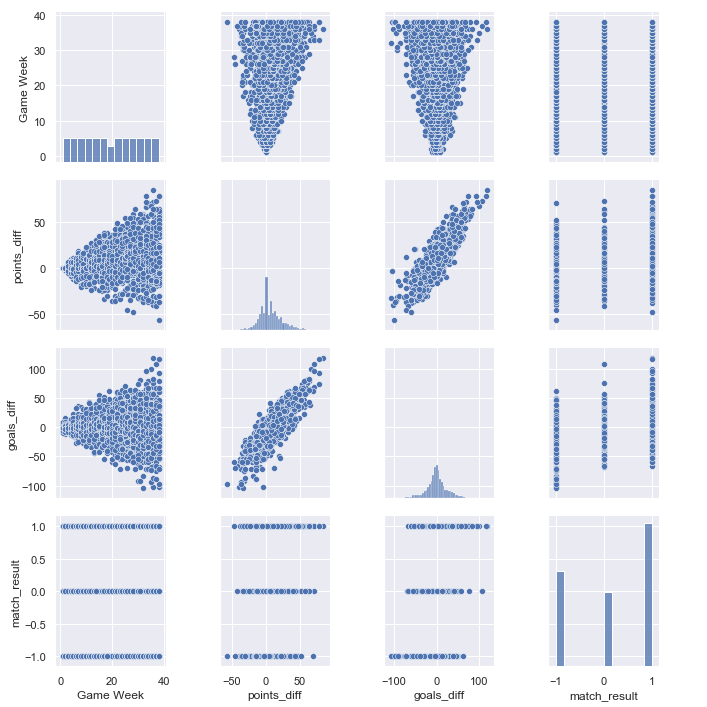

In [55]:
top_features = ['Game Week','points_diff','goals_diff','match_result']
epl_15_20_matches_top_features = epl_15_20_matches[top_features]
#epl_15_20_matches_top_features.head()
sns.pairplot(epl_15_20_matches_top_features)